In [2]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

C:\Users\sguir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
torch.cuda.is_available()

False

In [6]:
# Create a UNet model
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
)

In [7]:
# Create a Gaussian Diffusion model
diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 100,   # number of steps
    loss_type = 'l1'    # L1 or L2
)

In [8]:
trainer = Trainer(
    diffusion,
    './pics/train/',              # path to training images
    train_batch_size = 32,
    train_lr = 2e-5,
    train_num_steps = 700000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = True                        # turn on mixed precision
)

Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to C:\Users\sguir/.cache\torch\hub\checkpoints\pt_inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:04<00:00, 20.2MB/s]
C:\Users\sguir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\amp\autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [9]:
trainer.train()

  0%|          | 0/700000 [01:39<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
sampled_images = diffusion.sample(batch_size = 4)
sampled_images.shape # (4, 3, 128, 128)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


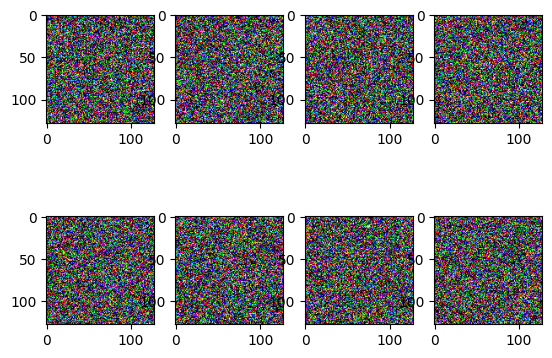

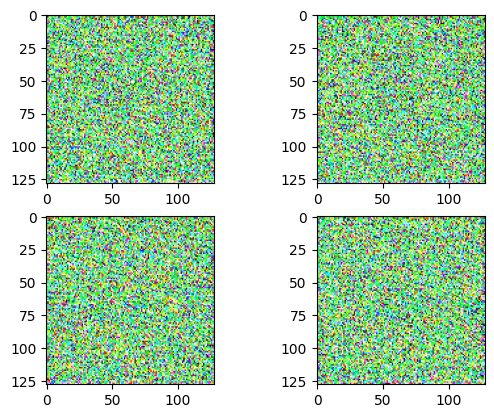